In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('Student_data.csv')

In [68]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [69]:
df.duplicated().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [72]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [73]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
char_features=[feature for feature in df.columns if df[feature].dtype=='O']


In [74]:
print(num_features)
print(char_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [75]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Observations

## All the scores are somewhat similar ,maths min is 0

In [77]:
# df.drop(inplace=True,axis=1,columns=[f for f in char_features])

In [78]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [79]:
df['Total']=df['math score']+df['reading score']+ df['writing score']
df['Average']=df['Total']/3

In [80]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<AxesSubplot: xlabel='Average', ylabel='Count'>

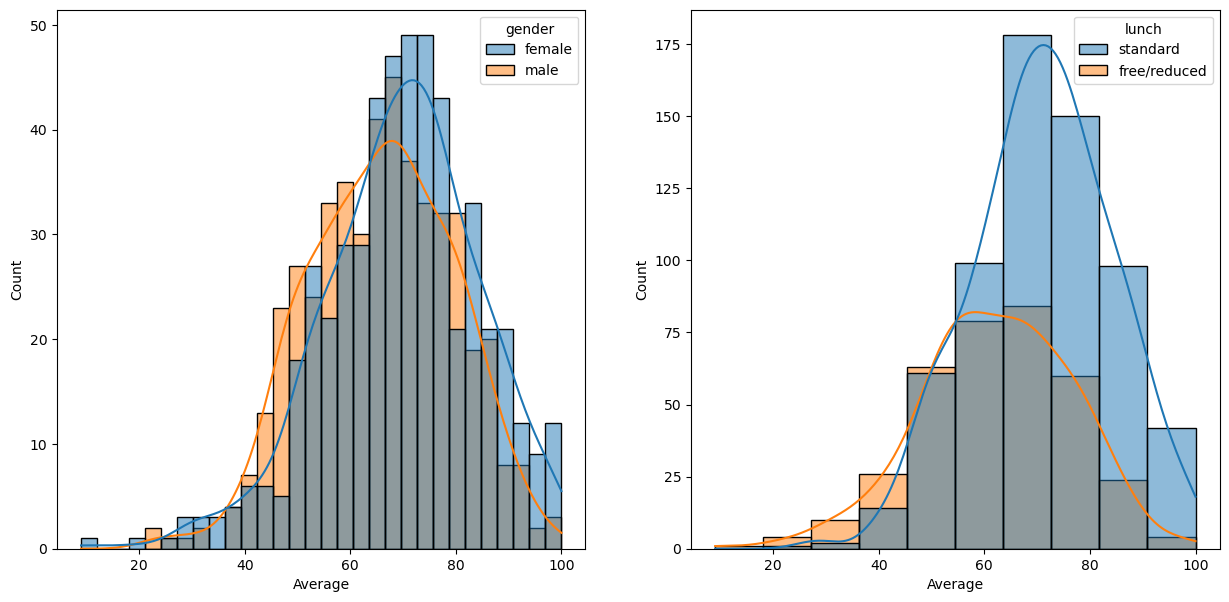

In [85]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],bins=30,kde=True,hue='gender')
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],bins=10,kde=True,hue='lunch')

<AxesSubplot: xlabel='Average', ylabel='Count'>

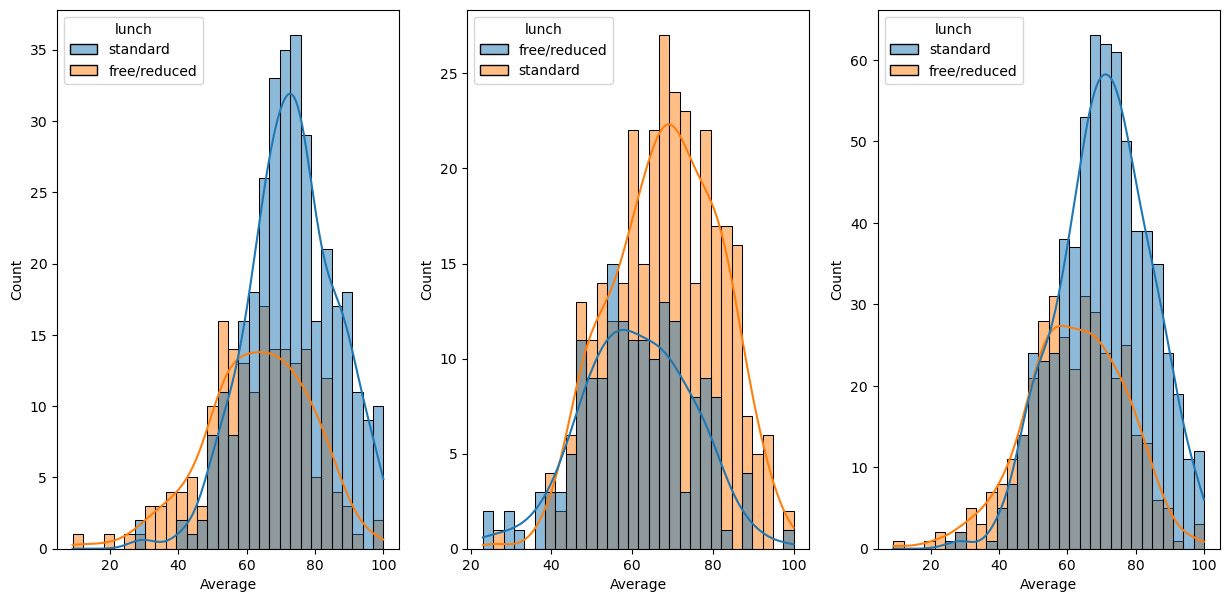

In [90]:
fig,axis=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df[df.gender=='female'],x=df['Average'],bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x=df['Average'],bins=30,kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df,x=df['Average'],bins=30,kde=True,hue='lunch')

<AxesSubplot: xlabel='Average', ylabel='Count'>

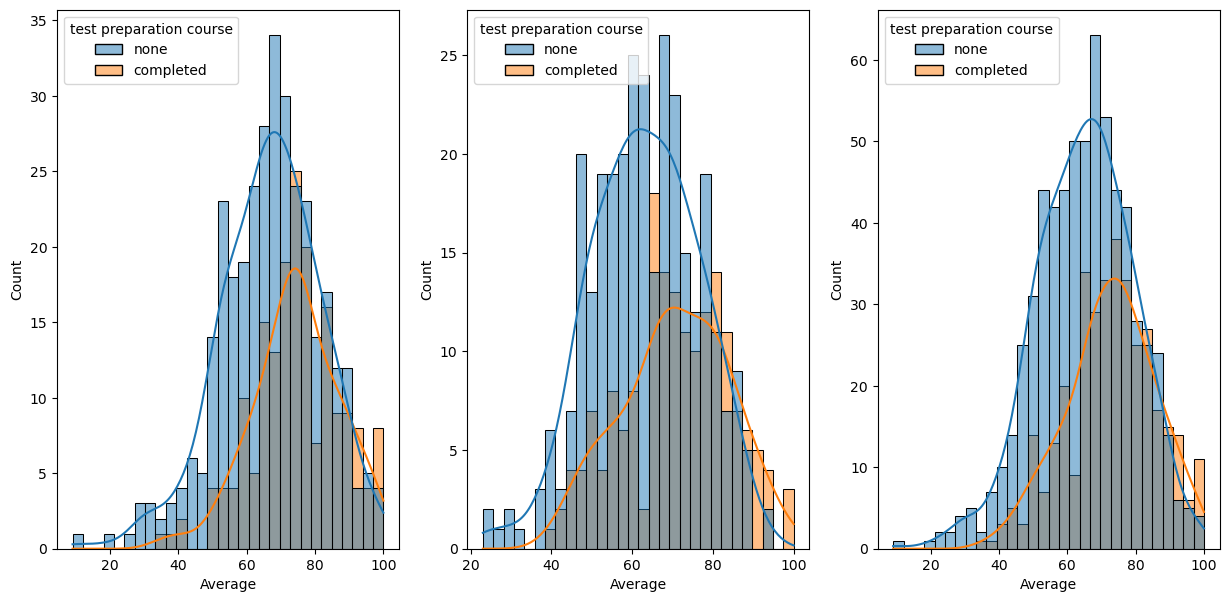

In [91]:
fig,axis=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df[df.gender=='female'],x=df['Average'],bins=30,kde=True,hue='test preparation course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x=df['Average'],bins=30,kde=True,hue='test preparation course')
plt.subplot(133)
sns.histplot(data=df,x=df['Average'],bins=30,kde=True,hue='test preparation course')

<AxesSubplot: xlabel='Average', ylabel='Count'>

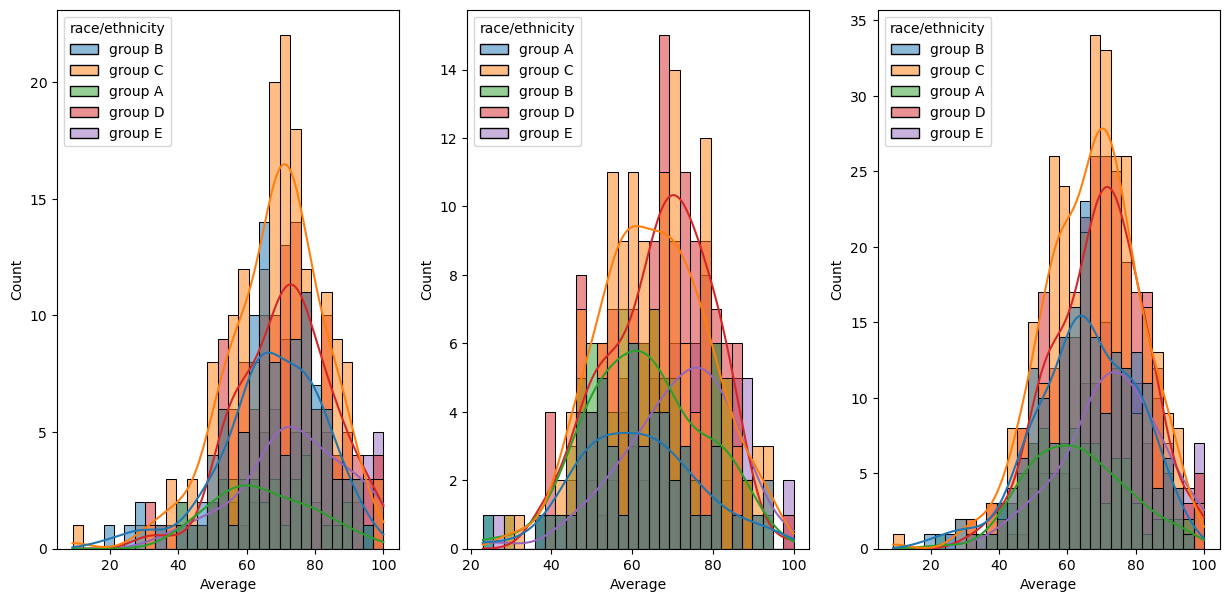

In [97]:
fig,axis=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df[df.gender=='female'],x=df['Average'],bins=30,kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x=df['Average'],bins=30,kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df,x=df['Average'],bins=30,kde=True,hue='race/ethnicity')